In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\admir\\Desktop\\gun-violence-data_01-2013_03-2018.csv')

In [4]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [5]:
df.info()
#Our dataset consists of 29 columns of up to 239677 rows of data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [6]:
df['state'].min() #Most popular country for gun violence of 2018

'Alabama'

In [7]:
df['state'].max() #Least popular country for gun violence of 2018

'Wyoming'

In [8]:
df['date'].max() #Date with most reported acts of gun violence.

'2018-03-31'

### Here I am doing a bit of Data Cleaning; simply removing the columns of data that I find irrelevant.


In [9]:
df = df.drop(columns=['notes', 'participant_age_group','incident_url_fields_missing','participant_relationship',
                      'sources','incident_url','source_url','congressional_district','location_description','longitude', 
                      'participant_name', 'participant_status', 'address', 'participant_type','state_house_district',
                      'state_senate_district', 'incident_id','date','latitude'], axis=1)

In [10]:
df['n_guns_involved'].dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 10 columns):
state                       239677 non-null object
city_or_county              239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
gun_stolen                  140179 non-null object
gun_type                    140226 non-null object
incident_characteristics    239351 non-null object
n_guns_involved             140226 non-null float64
participant_age             147379 non-null object
participant_gender          203315 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 17.5+ MB


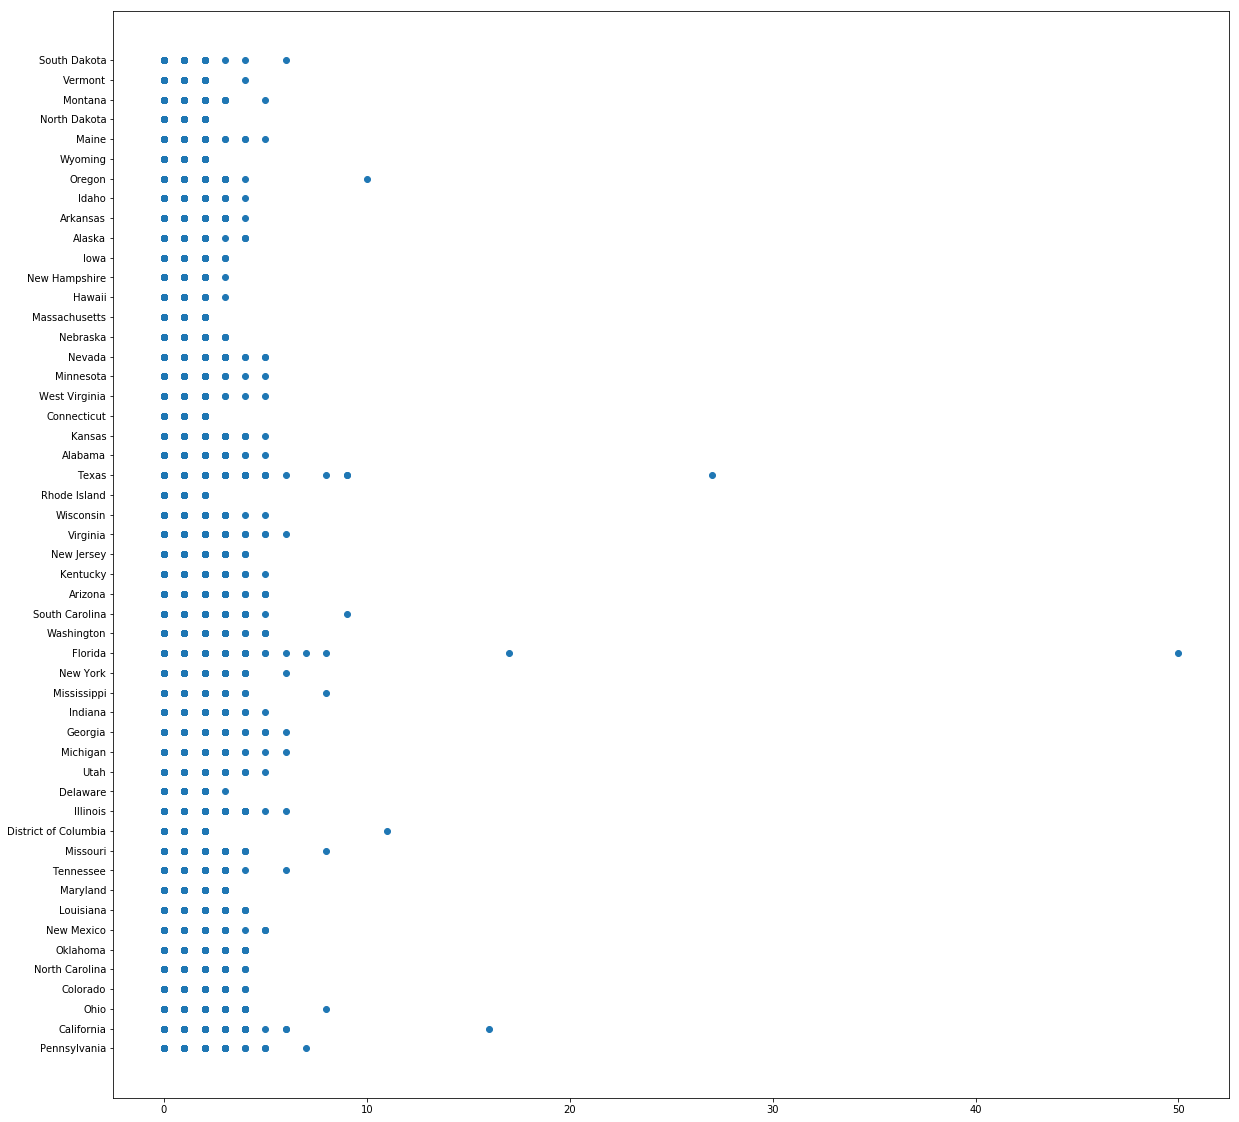

In [12]:
plt.figure(figsize=(20,20))
plt.scatter('n_killed', 'state', data=df)
plt.show()
#This plot tells us that Florida has had the highest number of Deaths related to gun violence in 2018. Let's examine it further.

In [13]:
df2 = df[df['state']=='Florida']

In [14]:
df2

,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_gender
40,Florida,Belle Glade,0,5,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,NaN
59,Florida,Williston,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,0::36||5::19,0::Male||1::Male||2::Male||3::Female||4::Femal...
131,Florida,Pompano Beach,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,0::23||1::54||2::35||3::23,0::Male||1::Male||2::Male||3::Male||4::Male||5...
151,Florida,Hialeah,7,0,0::Unknown,0::9mm,"Shot - Dead (murder, accidental, suicide)||Off...",1.0,0::79||1::69||2::33||3::64||4::51||5::17||6::42,0::Male||1::Female||2::Male||3::Male||4::Femal...
181,Florida,Lake Butler,4,1,0::Unknown||1::Unknown||2::Unknown,0::22 LR||1::410 gauge||2::32 Auto,"Shot - Wounded/Injured||Shot - Dead (murder, a...",3.0,0::28||1::80||2::66||3::44||4::72,0::Male||1::Male||2::Male||3::Male||4::Male
198,Florida,Kissimmee,0,5,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,NaN
203,Florida,Palm Beach,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,NaN
222,Florida,Margate,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,0::Male||1::Male||2::Male||3::Female
223,Florida,Miami,2,2,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,0::67||2::40||3::49,0::Male||1::Male||2::Male||3::Male
226,Florida,Miami Gardens,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male


In [15]:
df2['city_or_county'].values.argmax()

1710

In [16]:
df3 = df2.copy()

In [17]:
df3.head(3)

,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_gender
40,Florida,Belle Glade,0,5,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,NaN
59,Florida,Williston,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,0::36||5::19,0::Male||1::Male||2::Male||3::Female||4::Femal...
131,Florida,Pompano Beach,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,0::23||1::54||2::35||3::23,0::Male||1::Male||2::Male||3::Male||4::Male||5...


In [18]:
#Bit of Data cleaning to remove any Null values, to make the analysis easier.
df3.dropna(axis=0, how='any', inplace=True)

In [19]:
df3.head(3)

,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_gender
151,Florida,Hialeah,7,0,0::Unknown,0::9mm,"Shot - Dead (murder, accidental, suicide)||Off...",1.0,0::79||1::69||2::33||3::64||4::51||5::17||6::42,0::Male||1::Female||2::Male||3::Male||4::Femal...
181,Florida,Lake Butler,4,1,0::Unknown||1::Unknown||2::Unknown,0::22 LR||1::410 gauge||2::32 Auto,"Shot - Wounded/Injured||Shot - Dead (murder, a...",3.0,0::28||1::80||2::66||3::44||4::72,0::Male||1::Male||2::Male||3::Male||4::Male
312,Florida,Milton,0,0,0::Unknown,0::Unknown,Non-Shooting Incident||Drug involvement||ATF/L...,1.0,0::31||1::32,0::Male||1::Male


## At this point, I develop an idea to test whether there is a correlation between the number of people killed & the number of guns involved; to identify whether or not the availability of guns has a direct correlation to deaths. 

In [20]:
df3.corr()

,n_killed,n_injured,n_guns_involved
n_killed,1.000000,0.487534,-0.028339
n_injured,0.487534,1.000000,-0.031537
n_guns_involved,-0.028339,-0.031537,1.000000


In [21]:
df3

,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_gender
151,Florida,Hialeah,7,0,0::Unknown,0::9mm,"Shot - Dead (murder, accidental, suicide)||Off...",1.0,0::79||1::69||2::33||3::64||4::51||5::17||6::42,0::Male||1::Female||2::Male||3::Male||4::Femal...
181,Florida,Lake Butler,4,1,0::Unknown||1::Unknown||2::Unknown,0::22 LR||1::410 gauge||2::32 Auto,"Shot - Wounded/Injured||Shot - Dead (murder, a...",3.0,0::28||1::80||2::66||3::44||4::72,0::Male||1::Male||2::Male||3::Male||4::Male
312,Florida,Milton,0,0,0::Unknown,0::Unknown,Non-Shooting Incident||Drug involvement||ATF/L...,1.0,0::31||1::32,0::Male||1::Male
489,Florida,Orlando,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Dom...",1.0,0::35||1::15,0::Male||1::Male
516,Florida,Merritt Island,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,1.0,0::14,0::Female
841,Florida,Orlando (Pine Hills),0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,1.0,0::15||1::28,0::Male||1::Male
974,Florida,North Miami Beach,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",1.0,0::21||1::26,0::Male||1::Male
1044,Florida,Lady Lake,0,0,0::Unknown,0::Unknown,Non-Shooting Incident||Brandishing/flourishing...,1.0,0::49,0::Male
2167,Florida,Fort Pierce,1,0,0::Unknown,0::Unknown,Officer Involved Incident||Officer Involved Sh...,1.0,0::30,0::Male
2329,Florida,Orlando,0,2,0::Unknown||1::Unknown,0::38 Spl||1::9mm,Shot - Wounded/Injured||Accidental Shooting||A...,2.0,0::25||1::26,0::Male||1::Male


In [26]:
df4 = df3[['n_killed', 'n_injured', 'n_guns_involved']].copy()

In [28]:
df4.head(3)

,n_killed,n_injured,n_guns_involved
151,7,0,1.0
181,4,1,3.0
312,0,0,1.0


In [31]:
df4 = df4.astype(int)

In [36]:
df4.reset_index(drop=True, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262230E8A20>,
      dtype=object)

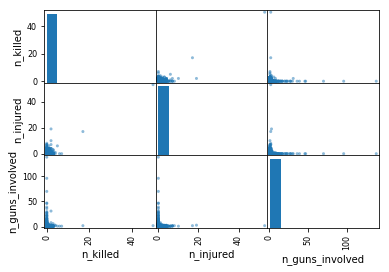

In [59]:
pd.plotting.scatter_matrix(df4)

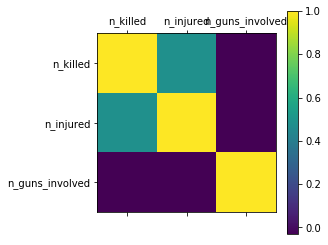

In [63]:
plt.matshow(df4.corr())
plt.xticks(range(len(df4.columns)), df4.columns)
plt.yticks(range(len(df4.columns)), df4.columns)
plt.colorbar()
plt.show()

## In an attempt to plot the correlation between the Number of Guns involved & the Number of people Injured/Killed, I've come to the conclusion that in this particular dataset for the state of Florida, there is no such correlation. Therefore, we've reached the end of  the road for this project. Goodbye!